In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 4

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

from mueller_matrices import M_Retarder, M_Diattenuator, M_rotate, M_LinearPolarizer, stokes2ellipse
from plotting import plotEllipse, plotEllipseStokes

## Some examples

### linear and circular states

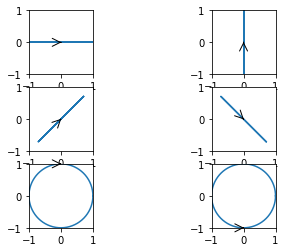

In [2]:
ax=plt.subplots(3,2)[1];

ellipt,orient=stokes2ellipse([1,1,0,0]) # Linear 0
plotEllipse(ellipt,orient,axes=ax[0,0])

ellipt,orient=stokes2ellipse([1,-1,0,0]) # Linear 90
plotEllipse(ellipt,orient,axes=ax[0,1])

ellipt,orient=stokes2ellipse([1,0,1,0]) # Linear 45
plotEllipse(ellipt,orient,axes=ax[1,0])

ellipt,orient=stokes2ellipse([1,0,-1,0]) # Linear 135
plotEllipse(ellipt,orient,axes=ax[1,1])

ellipt,orient=stokes2ellipse([1,0,0,1]) # Linear RCP
plotEllipse(ellipt,orient,axes=ax[2,0])

ellipt,orient=stokes2ellipse([1,0,0,-1]) # Linear LCP
plotEllipse(ellipt,orient,axes=ax[2,1])




### Universal compensator

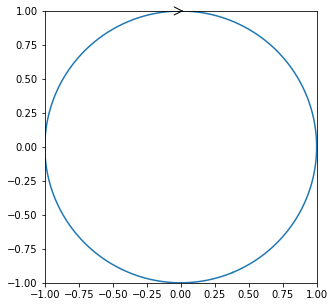

In [3]:
M_uni=  M_Retarder(theta=0,delta=np.pi) * M_Retarder(theta=np.pi/4,delta=np.pi/2)

inputpol = sp.Matrix([-1, 1, 0, 0])
S_outuni = M_uni * inputpol

ellipt,orient=stokes2ellipse(np.array(S_outuni).astype(np.float64)) # Llinear 0
plotEllipse(ellipt,orient)

## Test interactive plotting

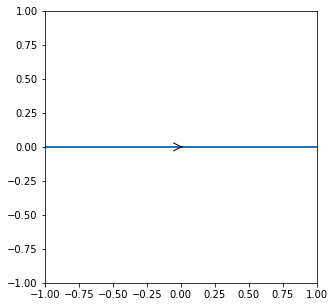

In [3]:
StokesV = [1,-1,1,1]

ellipt,orient=stokes2ellipse(np.array(StokesV).astype(np.float64)) # Llinear 0
plotEllipseStokes(1,0,0,0)

In [4]:
interact(plotEllipse,ellipt=(-1,1,0.1),\
         orient=(0,np.pi,np.pi/180),size=fixed(5),axes=fixed(None));


interactive(children=(FloatSlider(value=0.0, description='ellipt', max=1.0, min=-1.0), FloatSlider(value=1.570…

In [7]:
interact(plotEllipseStokes,S0=(.1,1,0.1),S1=(-10,10,0.5), S2=(-10,10,0.5), S3=(-10,10,0.5),size=fixed(5),axes=fixed(None));

interactive(children=(FloatSlider(value=0.5, description='S0', max=1.0, min=0.1), FloatSlider(value=0.0, descr…